In [1]:
from pycollisiondb.pycollisiondb import PyCollision
import matplotlib.pyplot as plt
%matplotlib inline

The simplest query is for a CollisionDB dataset from its ID using the query key, `'pk'` (for "Primary Key"):

In [3]:
query = {'pks': [108456]}
pycoll = PyCollision.get_datasets(query=query)

The `PyCollision` object returned contains a Python dictionary, `datasets`, containing the unique dataset with this ID:

In [4]:
pycoll

<PyCollision object at 0x1176bd190 (1 datasets)>

In [5]:
pycoll.datasets

{108456: D108456: e- + Ni+7 → Ni+8 + 2e-}

In [6]:
pycoll.datasets[108456]

D108456: e- + Ni+7 → Ni+8 + 2e-

Querying the database with a list of IDs using the query key, `'pks'` returns all of the data sets with those IDs:

In [7]:
query = {'pks': [108465, 108457, 108458]}
pycoll = PyCollision.get_datasets(query=query)

In [8]:
print(pycoll)

<PyCollision object 3 datasets)>


In [9]:
pycoll.datasets

{108457: D108457: e- + O+6 1s2;1S → O+6 1s.2p;1P + e-,
 108458: D108458: e- + Ni+8 → Ni+9 + 2e-,
 108465: D108465: e- + Ni+15 → Ni+16 + 2e-}

In [10]:
dataset = pycoll.datasets[108458]
dataset

D108458: e- + Ni+8 → Ni+9 + 2e-

In [11]:
type(dataset)

pycollisiondb.pycoll_ds.PyCollDataSet

`dataset` is an instance of the type `PyCollDataSet`, which contains metadata concerning the dataset:

In [12]:
dataset.metadata

{'qid': 'D108458',
 'reaction': 'e- + Ni+8 → Ni+9 + 2e-',
 'process_types': {'EIN': 'Ionization'},
 'data_type': 'cross section',
 'refs': {'B54': {'doi': 'https://doi.org/10.1063/1.555809'}},
 'comment': '',
 'method': 'semi-empirical',
 'columns': [{'name': 'E', 'units': 'eV'}, {'name': 'sigma', 'units': 'cm2'}],
 'fit': {'coeffs': {'pcf(1)': 193.0,
   'pcf(2)': 2.876,
   'pcf(3)': -2.321,
   'pcf(4)': 5.91,
   'pcf(5)': -10.306,
   'pcf(6)': -1.333,
   'pcf(7)': 7.738,
   'kncf': 7},
  'func': 'BELI',
  'Elo': 193.0,
  'Ehi': 20000.0},
 'data_from_fit': True,
 'from_aladdin': True,
 'metadata_version': 'M1.0',
 'time_added': '2023-02-09 16:01:54.138371+00:00'}

Here, `qid` is the "Qualified ID" of the dataset: the `D` prefix identifies it within the CollisionDB application as a dataset. The metadata also contains representations of the reaction, a collection of process identifiers (here `'EIN'` represents electron-impact ioniziation), and a collection of references identified by DOI. `columns` describes the meaning of the columns of numerical data, and in this case there is information concerning a functional fit to the data.

The `PyCollDataSet` object also contains a PyValem representation of the collisional process (generically an instance of `pyvalem.reaction.Reaction`), with useful methods for obtaining information about its reactants and products as well as some for outputing it in HTML and LaTeX format:

In [13]:
dataset.reaction

e- + Ni+8 → Ni+9 + 2e-

In [14]:
dataset.reaction.html

'e<sup>-</sup> + Ni<sup>8+</sup> → Ni<sup>9+</sup> + 2e<sup>-</sup>'

In [15]:
print(dataset.reaction.latex)

\mathrm{e}^- + \mathrm{Ni}^{8+} \rightarrow \mathrm{Ni}^{9+} + 2\mathrm{e}^-


In [16]:
print('Reactants:', dataset.reaction.reactants)
print('Products:', dataset.reaction.products)

Reactants: [(1, e-), (1, Ni+8)]
Products: [(1, Ni+9), (2, e-)]


The `reactants` and `products` are tuples of (stoichiometry, species) pairs, where the species are instances of `pyvalem.stateful_species.StatefulSpecies`:

In [17]:
dataset.reaction.products[0][1].formula

Ni+9

In [18]:
dataset.reaction.products[0][1].formula.charge

9

In [19]:
dataset.reaction.products[0][1].formula.rmm   # relative molecular/atomic mass

58.6934

`StatefulSpecies` may be associated with one or more quantum states:

In [20]:
dataset = pycoll.datasets[108457]
dataset

D108457: e- + O+6 1s2;1S → O+6 1s.2p;1P + e-

In [21]:
dataset.reaction.reactants[1]

(1, O+6 1s2;1S)

In [22]:
reactant = dataset.reaction.reactants[1][1]
reactant.formula, reactant.states

(O+6, [1s2, 1S])

PyValem defines several different types of quantum state, for example:

In [23]:
type(reactant.states[0]), type(reactant.states[1])

(pyvalem.states.atomic_configuration.AtomicConfiguration,
 pyvalem.states.atomic_term_symbol.AtomicTermSymbol)

The different states have different methods and attributes relevant to their meaning:

In [24]:
atom_config = reactant.states[0]
atom_config.nelectrons

2

In [25]:
atom_term = reactant.states[1]
print(f"S = {atom_term.S}, L = {atom_term.L}, J = {atom_term.J}")
print(f"2S+1 = {atom_term.Smult}")

S = 0.0, L = 0, J = None
2S+1 = 1


In [26]:
print(dataset.reaction.html)

e<sup>-</sup> + O<sup>6+</sup> 1s<sup>2</sup> <sup>1</sup>S → O<sup>6+</sup> 1s2p <sup>1</sup>P + e<sup>-</sup>


For this type of dataset there are two columns, with meanings and units given by the metadata `columns` entry:

In [27]:
dataset.x, dataset.y

(array([  114.8,   127. ,   140.6,   155.7,   172.3,   190.7,   211.1,
          233.7,   258.7,   286.3,   316.9,   350.8,   388.3,   429.8,
          475.8,   526.6,   582.9,   645.2,   714.2,   790.6,   875.1,
          968.6,  1072. ,  1187. ,  1314. ,  1454. ,  1610. ,  1782. ,
         1972. ,  2183. ,  2416. ,  2675. ,  2961. ,  3277. ,  3627. ,
         4015. ,  4444. ,  4919. ,  5445. ,  6027. ,  6672. ,  7385. ,
         8175. ,  9048. , 10020. , 11090. , 12270. , 13580. , 15040. ,
        16640. ]),
 array([1.405e-12, 2.224e-12, 3.366e-12, 4.892e-12, 6.855e-12, 9.298e-12,
        1.225e-11, 1.571e-11, 1.967e-11, 2.411e-11, 2.900e-11, 3.427e-11,
        3.987e-11, 4.573e-11, 5.178e-11, 5.796e-11, 6.421e-11, 7.045e-11,
        7.662e-11, 8.268e-11, 8.858e-11, 9.427e-11, 9.971e-11, 1.049e-10,
        1.098e-10, 1.143e-10, 1.185e-10, 1.224e-10, 1.259e-10, 1.291e-10,
        1.319e-10, 1.344e-10, 1.365e-10, 1.383e-10, 1.398e-10, 1.409e-10,
        1.417e-10, 1.422e-10, 1.425e-10,

In [28]:
dataset.metadata['columns']

[{'name': 'E', 'units': 'eV'}, {'name': 'rate', 'units': 'cm3.s-1'}]

The units can be changed using the syntax of the `pyqn` library, e.g.:

In [29]:
dataset.convert_units('E', 'J')
dataset.convert_units('rate', 'm3.hr-1')

In [30]:
dataset.x, dataset.y

(array([1.83929861e-17, 2.03476414e-17, 2.25266014e-17, 2.49458879e-17,
        2.76055009e-17, 3.05535056e-17, 3.38219456e-17, 3.74428645e-17,
        4.14483057e-17, 4.58703128e-17, 5.07729729e-17, 5.62043512e-17,
        6.22125130e-17, 6.88615454e-17, 7.62315573e-17, 8.43706138e-17,
        9.33908674e-17, 1.03372427e-16, 1.14427445e-16, 1.26668073e-16,
        1.40206464e-16, 1.55186815e-16, 1.71753319e-16, 1.90178349e-16,
        2.10525990e-16, 2.32956461e-16, 2.57950414e-16, 2.85507850e-16,
        3.15949203e-16, 3.49755127e-16, 3.87085839e-16, 4.28582210e-16,
        4.74404458e-16, 5.25033235e-16, 5.81109412e-16, 6.43273860e-16,
        7.12007231e-16, 7.88110614e-16, 8.72385097e-16, 9.65631769e-16,
        1.06897215e-15, 1.18320734e-15, 1.30977928e-15, 1.44964929e-15,
        1.60538084e-15, 1.77681372e-15, 1.96587055e-15, 2.17575567e-15,
        2.40967344e-15, 2.66602167e-15]),
 array([5.05800e-15, 8.00640e-15, 1.21176e-14, 1.76112e-14, 2.46780e-14,
        3.34728e-14, 

To change the units of all the datasets in a `PyCollision` object, pass a dictionary mapping the column names to the new units. The datasets must all be of the same `data_type`, however (e.g. all cross sections, or all rates):

In [31]:
query = {'pks': [108458, 108465]}
pycoll = PyCollision.get_datasets(query=query)

In [32]:
pycoll.datasets

{108458: D108458: e- + Ni+8 → Ni+9 + 2e-,
 108465: D108465: e- + Ni+15 → Ni+16 + 2e-}

These datasets are cross sections:

In [33]:
pycoll.datasets[108458].metadata["columns"], pycoll.datasets[108465].metadata["columns"]

([{'name': 'E', 'units': 'eV'}, {'name': 'sigma', 'units': 'cm2'}],
 [{'name': 'E', 'units': 'eV'}, {'name': 'sigma', 'units': 'cm2'}])

In [34]:
# Convert energies to J and cross sections to Mb:
pycoll.convert_units({'E': 'J', 'sigma': 'Mb'})

In [35]:
pycoll.datasets[108458].metadata["columns"], pycoll.datasets[108465].metadata["columns"]

([{'name': 'E', 'units': 'J'}, {'name': 'sigma', 'units': 'Mb'}],
 [{'name': 'E', 'units': 'J'}, {'name': 'sigma', 'units': 'Mb'}])

Datasets can also be plotted, providing they are of the same type and have the same units. Uncertainties, where available, are indicated.

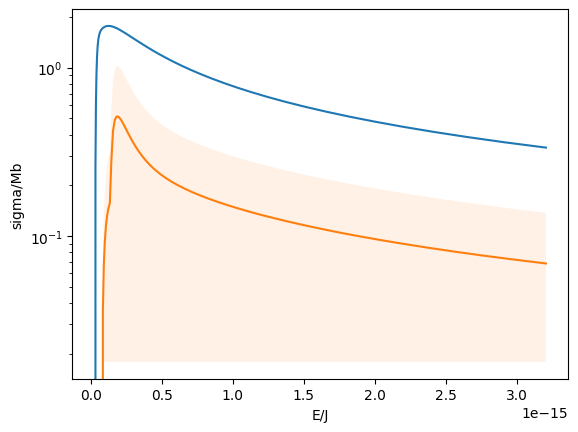

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
pycoll.plot_all_datasets(ax)